# Testing Neural Network-based image segmentation models on your data
---
This notebook gives you access to several pre-installed segmentation models that can be easily run and compared on your image data-set. Please follow the instructions below to upload your data and test the models.

The notebook is licensed under CC BY-NC 4.0
Copyright (C) 2024 Franziska Oschmann, Scientific IT Services of ETH Zurich.

Contributing Authors:  Franziska Oschmann  together with  Andrzej Rzepiela (ScopeM ETH) and Szymon Stoma (ScopeM ETH), and Emmanouela Rantsiou.

# 1. Install dependencies
- The notebook runs on the **L4 accelator**. Select it in 'Runtime' by clicking 'Change runtime type'
- To run a code `cell` (separate piece of code), click on it and press the `play` button on the top left of it.
- It will take about 1 min to install dependencies in the cell below
- Ignore the restart warning message



In [ ]:
import os, pathlib

MARKER = "/content/.biscuit_env_ready"

if not os.path.exists(MARKER):
    print(
        "Setting up BISCUIT environment (one-time install)...\n"
        "*** The runtime will RESTART AUTOMATICALLY at the end of this cell. ***\n"
        "After the restart, SKIP this cell and continue from the next one."
    )

    !pip install --no-deps git+https://github.com/ScopeM/biscuit.git@dev_ER > /dev/null 2>&1
    !pip install --no-deps git+https://www.github.com/mouseland/cellpose.git > /dev/null 2>&1
    !pip install -q --no-deps numpy==1.26.4 "scipy>=1.11.4,<1.12" scikit-image>=0.22 \
      opencv-python>=4.8.1 pandas>=2.0.2 stardist>=0.9.1 omnipose>=1.0.6 tqdm gitpython coverage mpl_interactions \
      ipympl csbdeep fastremap edt igraph texttable mgen pbr ncolor mahotas torchvf peakdetect fill_voids roifile segment_anything > /dev/null 2>&1
    !pip install -q "bioimageio.core[onnx,pytorch]" > /dev/null 2>&1

    pathlib.Path(MARKER).touch()

    os._exit(0)

else:
    print("\nBISCUIT environment already prepared. You can skip this cell.")

Setting up BISCUIT environment (one-time install)...
*** The runtime will RESTART AUTOMATICALLY at the end of this cell. ***
After the restart, SKIP this cell and continue from the next one.


If you want to use the notebook more often, follow the instructions [here](https://medium.com/@ismailelalaoui/how-to-install-external-libraries-permanently-on-google-colab-eaa4509fb43f) to install dependencies permanently on your google drive

Now, **download the custom segmentation models**. Standard models are loaded from libraries.

In [1]:
!biscuit_download --force

## 2. Upload of images

- Run the first `cell` below to load the required libraries and optionally enable advanced segmentation options (scale sweep).
If you are not sure what this is, just leave the checkbox unchecked and continue.

  Then:
    
    1. Run the **next** **`cell`** to select the `data/raw_im/` data folder (don't miss the 'select' button that appears below the cell).

    2. Run the following cell to select the image files you want to analyse.  This will take about 30 sec.

- In `/content/data/raw_im/` there are several example images that can be used to test the notebook. If you want other images, upload them to the folder `/content/data/raw_im/`. To do this, in the panel on the left click on the folder icon and then drag and drop your image files into directory `/content/data/raw_im/`.

- Uploaded images should have the same size (the example set is 256x256, you can also remove it)


In [2]:
import os; os.environ["MATPLOTLIB_BACKEND"] = "module://ipympl.backend_nbagg"
import matplotlib
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import output
output.enable_custom_widget_manager()

import ipywidgets as widgets
from IPython.display import display

advanced_opts_toggle = widgets.Checkbox(
    value=False,
    description="Enable scale sweep (advanced)",
    indent=False,
    layout=widgets.Layout(width="260px")
)

advanced_opts_box = widgets.VBox([
    widgets.HTML(
        """
        <div style="
            background:#f0f7ff;
            border:1px solid #b7d7ff;
            padding:10px 15px;
            border-radius:8px;
            margin-bottom:5px;">
            <b>Advanced Segmentation Settings</b> (optional)
            <br>
            Use only if you want to run parameter sweeps over the "scale" parameter.
        </div>
        """
    ),
    advanced_opts_toggle,
    widgets.HTML(
        "<em>Runs each selected model across multiple 'scale' values "
        "to assess segmentation robustness. "
        "Leave this OFF unless you specifically want to test parameter sweeps.</em>"
    )
])

display(advanced_opts_box)


In [3]:
%matplotlib ipympl
from midap.midap_jupyter.segmentation_jupyter import SegmentationJupyter

path = '/content/data/'
sj = SegmentationJupyter(path = path)
sj.enable_scale_sweep = advanced_opts_toggle.value
sj.get_input_dir()
display(sj.fc_file)

FileChooser(path='/content/data', filename='', title='', show_hidden=False, select_desc='Select', change_desc=…

Please make sure that the folder has been selected. Then run the next cell to select the files (mark them with the mouse).

In [4]:
sj.get_input_files(sj.fc_file.selected)

SelectMultiple(description='Files', layout=Layout(height='250px', width='600px'), options=('deepbacs_BSubtilis…

Button(description='Select', style=ButtonStyle())

## 3. Choose image axes

This is where we define the labels for the image axes. We need to specify which axes contain the number of images and the number of channels in the uploaded image stack. Based on this information, the image stack will be transformed into the following shape (num_images, width, height, num_channels). Please run the two cells below and select the correct options.

In [5]:
sj.load_input_image()

In [6]:
sj.spec_img_dims()
sj.align_img_dims()

## 2. Select channel

Select the channel which will be used for the further analysis. If images in your set contain only one channel, keep the channel '0'. Please run both cells below.

In [7]:
%matplotlib ipympl
sj.select_channel()
display(sj.output_sel_ch)

interactive(children=(Dropdown(description='Channel', layout=Layout(width='50%'), options=(0,), value=0), IntS…

In [8]:
sj.set_channel()

## 3. Define ROI

Define the region of interest (the same for all the images) by zooming (zoom to rectangle tool) into the part of the image you want to segment. Run all the cells below.

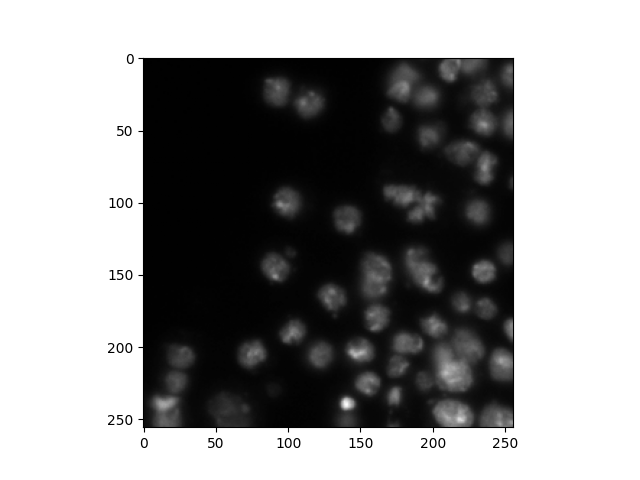

In [9]:
%matplotlib ipympl
sj.show_example_image(sj.imgs_sel_ch[0,:,:,0])

In [10]:
sj.get_corners_cutout()
sj.make_cutouts()

%matplotlib ipympl
sj.show_all_cutouts()
sj.output_all_cuts

interactive(children=(IntSlider(value=0, description='Image ID', max=1), Output()), _dom_classes=('widget-inte…

In [11]:
sj.save_cutouts()

## 4. Model selection

You can choose between different models trained on different species, markers and neural network types. Select the models by running the cell below and clicking through the options (the selected models will appear in the list below the cell).

- By running the following cell, segmentations with all selected models are generated.

- This will take some time depending on how many models and images you have

In [12]:
csv_url = "https://raw.githubusercontent.com/ScopeM/biscuit/refs/heads/main/model_list/model_list.csv"

df_model_interact = pd.read_csv(csv_url)

sj.select_and_run_segmentation_models(df_model_interact)


,Model Name,Family,NN type,Version,Target,Modality,Dimensions,Functionality,Trained on,Good for,NOT good for,Channels expected,Useful docs,Comments
0,stardist_2D_paper_dsb2018,StarDist,U‑Net based Star‑convex polygon prediction for...,-,General purpose nuclei,fluorescence,2D,Instance Segmentation,Subset of DSB 2018 nuclei challenge dataset,Star-convex nuclei,Generalization outside nuclei / fluorescence; ...,1,github.com/stardist/stardist#pretrained-models,—
1,stardist_2D_versatile_fluo,StarDist,U‑Net based Star‑convex polygon prediction for...,-,General purpose nuclei,fluorescence,2D,Instance Segmentation,Subset of DSB 2018 nuclei challenge dataset,"Star-convex, roundish fluorescent nuclei; robu...","Elongated or irregular shapes (bacteria, worms...",1,github.com/stardist/stardist#pretrained-models,—
2,nuclei,Omnipose,U-Net with distance field & flow outputs,-,General purpose nuclei,NaN,1D,Instance Segmentation,NaN,"General nuclei segmentation, diverse morphologies",Very elongated objects (worms); multi-cell clu...,1,NaN,—
3,bact_fluor_omni,Omnipose,U-Net with distance field & flow outputs,-,Bacteria,fluorescence,2D,Instance Segmentation,bacterial fluorescence images (membrane/cytosol),Bacterial cells in fluorescence imaging,Phase-contrast bacteria; eukaryotic nuclei,2,github.com/kevinjohncutler/omnipose,—
4,bact_phase_omni,Omnipose,U-Net with distance field & flow outputs,-,bacteria,phase/brightfield,2D,Instance Segmentation,bacterial phase-contrast images,Bacteria in phase-contrast/brightfield imaging,Fluorescent data; large cells,2,github.com/kevinjohncutler/omnipose,—
5,worm_omni,Omnipose,U-Net with distance field & flow outputs,-,Worms,NaN,2D,Instance Segmentation,C. elegans morphology images,C. elegans worms and similar elongated organisms,Small round nuclei; high-density bacteria,2,github.com/kevinjohncutler/omnipose,—
6,worm_bact_omni,Omnipose,U-Net with distance field & flow outputs,-,Worms/bacteria,NaN,2D,Instance Segmentation,mixed worm + bacterial images,Mixed worm–bacteria environments,Pure nuclei datasets; fluorescence-only segmen...,2,github.com/kevinjohncutler/omnipose,—
7,cpsam,Cellpose+SAM,U-Net with SAM (Segment Anything Model) backbone,-,Generalist Instance segmentation across modali...,NaN,2D,Instance Segmentation,cellpose+sam generalist,"Generalist: broad range of cells, tissues, mic...",May be heavier/slower; sometimes oversegments ...,2,github.com/mouseland/cellpose,—
8,BioImage.IO_conscientious_seashell,-,DPN-UNet,-,Nuclei,fluorescence,2D,Instance Segmentation,Human Protein Atlas cell segmentation dataset,RGB/DAPI nuclei,Non-fluorescence,3,https://bioimage.io/#/artifacts/conscientious...,RGB input
9,BioImage.IO_jolly_duck,BiaPy,2D U-NeXt V1,-,mitochondria,TEM,2D,Instance Segmentation,datasets: Lucchi++ Kasthuri++,mitochondria,Very low SNR,1,https://sites.google.com/view/connectomics/ h...,


25-12-01 14:14:35 base_segmentator.py INF   TensorFlow will run on GPU(s): ['/physical_device:GPU:0'] 
Found model '2D_paper_dsb2018' for 'StarDist2D'.
5231396/5231396 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Loading network weights from 'weights_last.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.417819, nms_thresh=0.5.
25-12-01 14:14:43 base_segmentator.py INF   TensorFlow will run on GPU(s): ['/physical_device:GPU:0'] 
https://www.cellpose.org/models/nucleitorch_0 /root/.cellpose/models/nucleitorch_0


100%|██████████| 25.3M/25.3M [00:02<00:00, 9.07MB/s]


  0%|          | 0/2 [00:00<?, ?it/s]






==== Inference Time Summary ====

____ Running on GPU: Tesla T4 ____


,Model,Images,Total time (s),Images / s
0,stardist_2D_paper_dsb2018,2,0.325620,6.142122
1,nuclei,2,0.659063,3.034609


- Run this cell to compare results:  
    Pick two models from the drop-downs and use the slider to step through images.  
    Shown plots are: raw image, both segmentations, overlays of segmentations to raw image, a disagreement bar chart.


In [13]:
sj.compare_and_plot_segmentations()

Output()

Output()

Choose the name of the model weights giving the best segmentation result:

In [14]:
sj.display_buttons_weights()
display(sj.out_weights)

RadioButtons(description='Model weights:', layout=Layout(width='100%'), options=(('stardist_2D_paper_dsb2018',…

## 5. Save segmentations

Based on the chosen model and model weights, the whole image stack will be segmented. In case you would like to upload an additional file for the segmentation, please do that below.

In [15]:
sj.load_add_files()
sj.out_add_file

interactive(children=(Checkbox(value=False, description='Do you want to select an additional dataset for the s…

In [16]:
sj.process_images()

25-12-01 14:16:27 base_segmentator.py INF   TensorFlow will run on GPU(s): ['/physical_device:GPU:0'] 
Found model '2D_paper_dsb2018' for 'StarDist2D'.
Loading network weights from 'weights_last.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.417819, nms_thresh=0.5.


You find the segmented images under `/content/data/seg_im/`.